# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
# added json import to pull examples from the API
import json
# will most likely change scipy.stats to import st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print("The cities list is just for me to test from.")
pprint(cities)

#Am I supposed to get 600 cities? I only get 1000 pings per day wit the API. 


Number of cities in the list: 596
The cities list is just for me to test from.
['cabo san lucas',
 'port mathurin',
 'gereida',
 'waitangi',
 'port-aux-francais',
 'constantia',
 'ulsteinvik',
 'olavarria',
 'jamestown',
 'buka',
 'hasaki',
 'ust-nera',
 'dudinka',
 'klyuchi',
 'carnarvon',
 'minas de marcona',
 'yagry',
 'lebu',
 'ketchikan',
 'puerto ayora',
 'georgetown',
 'lionel town',
 'borogontsy',
 'tiksi',
 'utrik',
 'adamstown',
 'invercargill',
 'bilibino',
 'vila franca do campo',
 'atafu village',
 'bredasdorp',
 'west island',
 'kavieng',
 'yellowknife',
 'oumache',
 'conduaga',
 'white house',
 'puerto san carlos',
 'puerto natales',
 'campbell river',
 'sao vicente',
 'bethel',
 'kirensk',
 'archidona',
 'lazaro cardenas',
 'kodiak',
 'enewetak',
 'olonkinbyen',
 'ushuaia',
 'grytviken',
 'puerto deseado',
 'erenhot',
 'flying fish cove',
 'fuvahmulah',
 'cudahy',
 'mili',
 'ribeira grande',
 'taiohae',
 'mitu',
 'colonia',
 'gejiu',
 'tahe',
 'albany',
 'jeremie',
 'po

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Making sure I am starting this right, and testing pulls. 
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric"
test_city = np.random.choice(cities)

# Build query URL
query_url = url + "&appid=" + weather_api_key + "&q=" + test_city

# print(requests.get(query_url))
# Response 200 means that the request was successful

response = requests.get(query_url).json()
pprint(json.dumps(response, indent=4, sort_keys=True))

('{\n'
 '    "base": "stations",\n'
 '    "clouds": {\n'
 '        "all": 20\n'
 '    },\n'
 '    "cod": 200,\n'
 '    "coord": {\n'
 '        "lat": -25.0319,\n'
 '        "lon": 46.9987\n'
 '    },\n'
 '    "dt": 1715034929,\n'
 '    "id": 1055433,\n'
 '    "main": {\n'
 '        "feels_like": 22.47,\n'
 '        "humidity": 83,\n'
 '        "pressure": 1021,\n'
 '        "temp": 22.04,\n'
 '        "temp_max": 22.04,\n'
 '        "temp_min": 22.04\n'
 '    },\n'
 '    "name": "T\\u00f4lanaro",\n'
 '    "sys": {\n'
 '        "country": "MG",\n'
 '        "id": 2147,\n'
 '        "sunrise": 1715051838,\n'
 '        "sunset": 1715091586,\n'
 '        "type": 1\n'
 '    },\n'
 '    "timezone": 10800,\n'
 '    "visibility": 10000,\n'
 '    "weather": [\n'
 '        {\n'
 '            "description": "few clouds",\n'
 '            "icon": "02n",\n'
 '            "id": 801,\n'
 '            "main": "Clouds"\n'
 '        }\n'
 '    ],\n'
 '    "wind": {\n'
 '        "deg": 80,\n'
 '        "

In [5]:
# Testing target cities to ID the error in the pulling the data down. 

# !!!! DON"T RUN THIS IF YOU PLAN TO RUN THE LOOP !!!! 

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Manually adding city names to the "cities" array for testing. AI and class notes helped me build this. 
cities = ["longyearbyen", "ribeira grande", "tazovsky", "ban houayxay", "grytviken"]

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of %s | %s" % (i + 1, len(cities), city))

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# ASK THIS QUESTION: Why is it saying that the city is not found?
# So it pulled the data down, and added them to my city_data list... I will need to reset the city list, but I think that means my code is working... So why is it saying that the city is not found?


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of 5 | longyearbyen
Processing Record 2 of 5 | ribeira grande
Processing Record 3 of 5 | tazovsky
Processing Record 4 of 5 | ban houayxay
Processing Record 5 of 5 | grytviken
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
#My trials to get the data from the API

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        city_info = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_info["coord"]["lat"]
        city_lng = city_info["coord"]["lon"]
        city_max_temp = city_info["main"]["temp_max"]
        city_humidity = city_info["main"]["humidity"]
        city_clouds = city_info["clouds"]["all"]
        city_wind = city_info["wind"]["speed"]
        city_country = city_info["sys"]["country"]
        city_date = city_info["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 2 of Set 1 | puerto natales
City not found. Skipping...
Processing Record 3 of Set 1 | wailua homesteads
City not found. Skipping...
Processing Record 4 of Set 1 | waitangi
City not found. Skipping...
Processing Record 5 of Set 1 | grytviken
City not found. Skipping...
Processing Record 6 of Set 1 | longyearbyen
City not found. Skipping...
Processing Record 7 of Set 1 | thinadhoo
City not found. Skipping...
Processing Record 8 of Set 1 | port alfred
City not found. Skipping...
Processing Record 9 of Set 1 | iqaluit
City not found. Skipping...
Processing Record 10 of Set 1 | medina
City not found. Skipping...
Processing Record 11 of Set 1 | invercargill
City not found. Skipping...
Processing Record 12 of Set 1 | bilibino
City not found. Skipping...
Processing Record 13 of Set 1 | college
City not found. Skipping...
Processing Record 14 of Set 1

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + cities
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = # YOUR CODE HERE
        city_lng = # YOUR CODE HERE
        city_max_temp = # YOUR CODE HERE
        city_humidity = # YOUR CODE HERE
        city_clouds = # YOUR CODE HERE
        city_wind = # YOUR CODE HERE
        city_country = # YOUR CODE HERE
        city_date = # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

SyntaxError: invalid syntax (2715841986.py, line 35)

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          5
Lat           5
Lng           5
Max Temp      5
Humidity      5
Cloudiness    5
Wind Speed    5
Country       5
Date          5
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,286.84,62,35,14.35,SH,1714946745
1,east end,34.5507,-92.3410,293.65,91,100,2.23,US,1714947111
2,jaciara,-15.9653,-54.9683,300.01,44,0,1.39,BR,1714946913
3,holualoa,19.6228,-155.9522,298.06,80,40,3.60,US,1714946867
4,chibougamau,49.9168,-74.3659,283.94,93,100,5.66,CA,1714947112


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,286.84,62,35,14.35,SH,1714946745
1,east end,34.5507,-92.3410,293.65,91,100,2.23,US,1714947111
2,jaciara,-15.9653,-54.9683,300.01,44,0,1.39,BR,1714946913
3,holualoa,19.6228,-155.9522,298.06,80,40,3.60,US,1714946867
4,chibougamau,49.9168,-74.3659,283.94,93,100,5.66,CA,1714947112


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

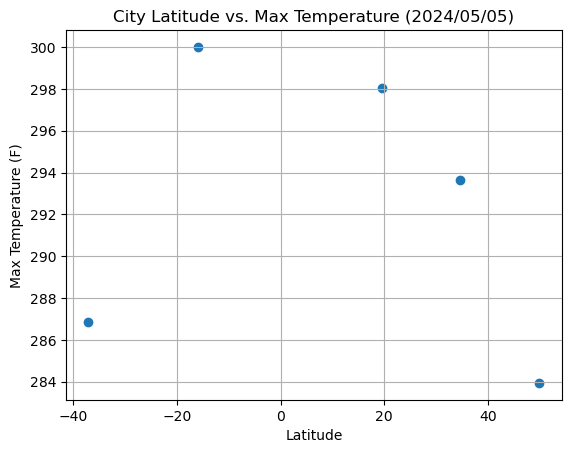

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024/05/05)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

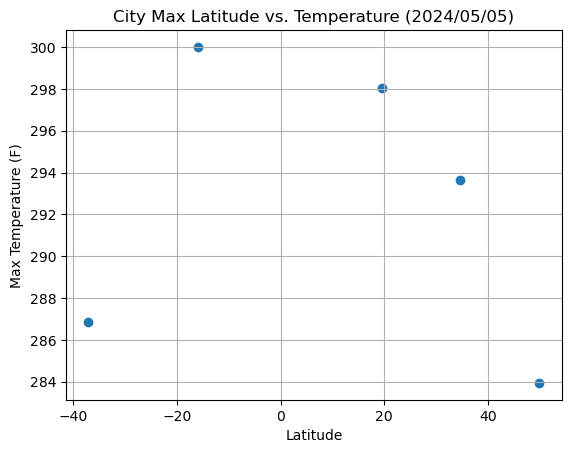

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024/05/05)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

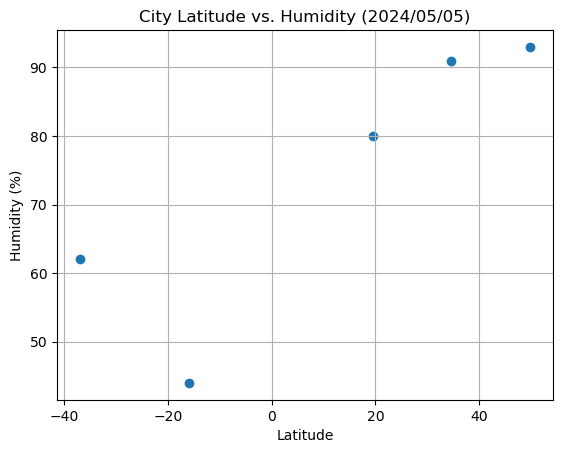

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024/05/05)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

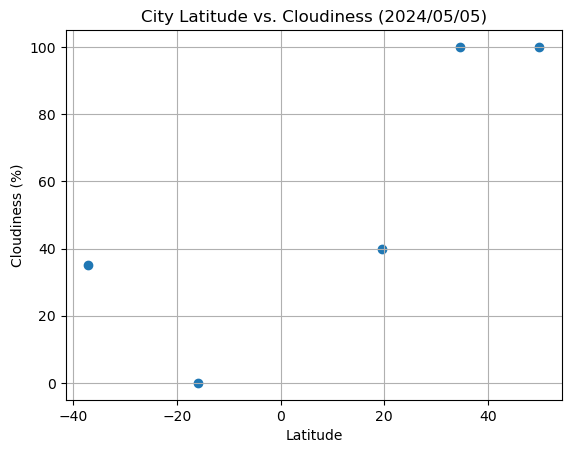

In [36]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024/05/05)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

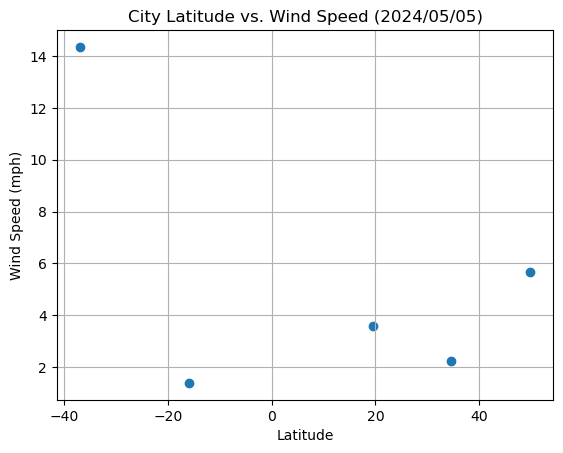

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024/05/05)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,east end,34.5507,-92.3410,293.65,91,100,2.23,US,1714947111
3,holualoa,19.6228,-155.9522,298.06,80,40,3.60,US,1714946867
4,chibougamau,49.9168,-74.3659,283.94,93,100,5.66,CA,1714947112


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,286.84,62,35,14.35,SH,1714946745
2,jaciara,-15.9653,-54.9683,300.01,44,0,1.39,BR,1714946913


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.9585366248604311


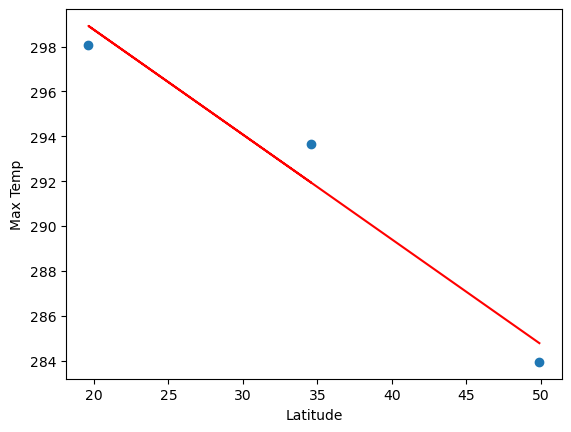

In [28]:
# Linear regression on Northern Hemisphere
# .stats is the library, then you need a function. in this case we are using linregress
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 1.0


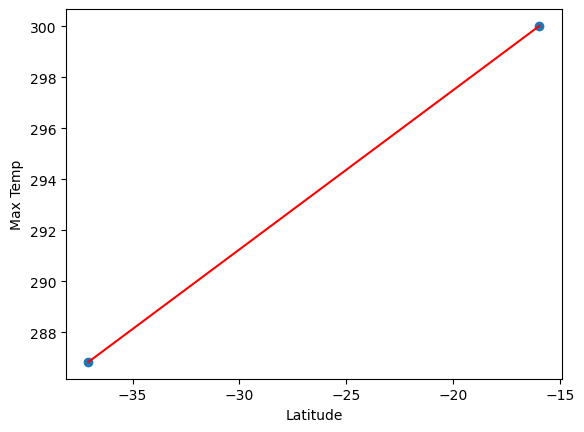

In [29]:
# Linear regression on Southern Hemisphere
# .stats is the library, then you need a function. in this case we are using linregress
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

# I NEED TO DO THIS STILL !!! !! ! ! !! 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.856438329732245


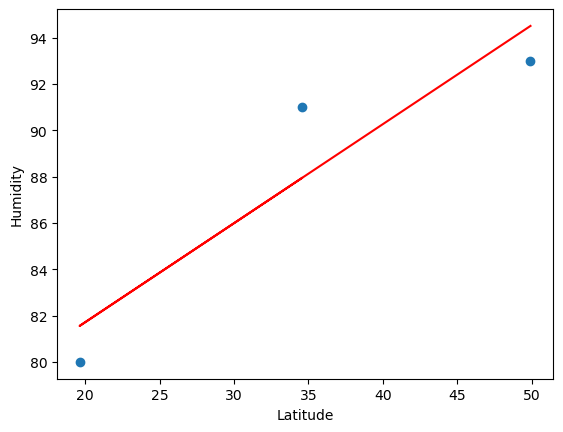

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 1.0


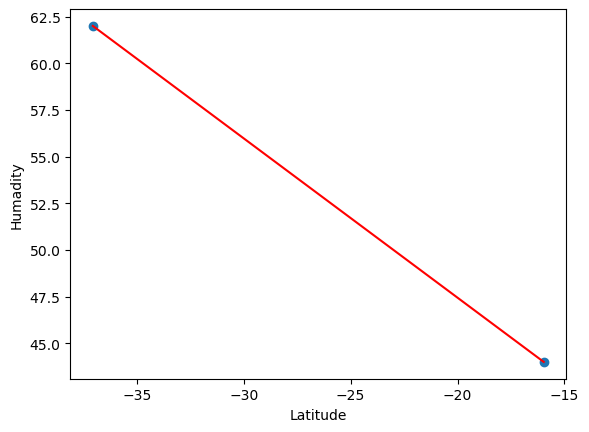

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humadity')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE


!!! ! I need to do THIS !!!! !  ! ! ! ! !! !

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.856438329732245


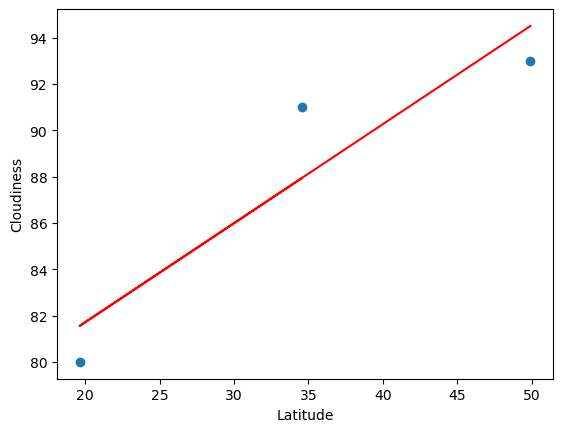

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 1.0


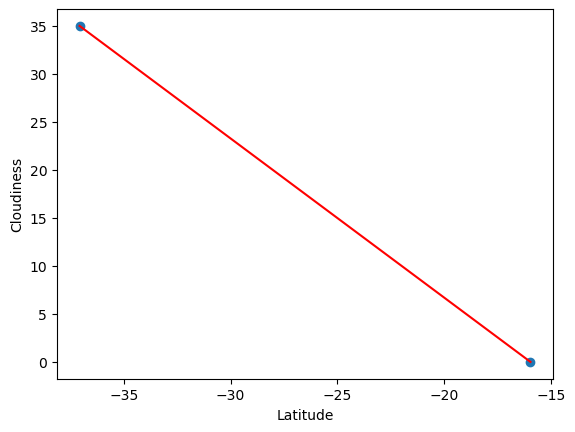

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.856438329732245


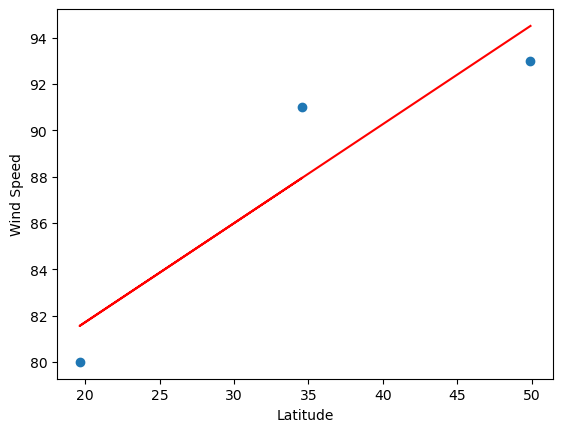

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.856438329732245


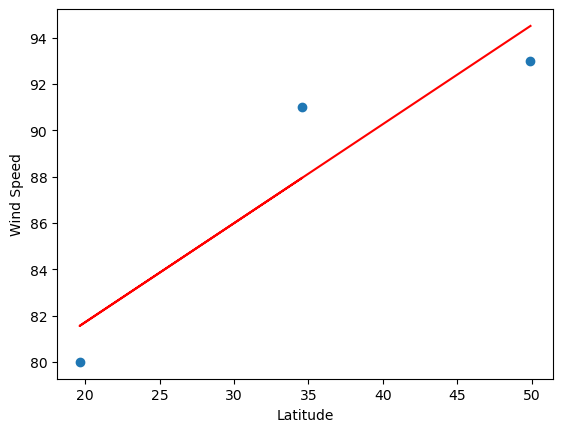

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE